In [1]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 453 kB 45.7 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f40048f0f10>)

In [3]:
data1 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/project/자연어/전체댓글/csv3524_negative(2).csv')
data2 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/project/자연어/전체댓글/3048_positive.csv')

In [6]:
data1[['content','ratings']], data2[['content','ratings']]


data = pd.concat([data1[['content','ratings']],data2[['content','ratings']]], ignore_index=True)


In [10]:
data['label'] = 2

In [11]:
data['label'] =  np.where(data['ratings'] >= 4, 1, data['label'])
data['label'] =  np.where(data['ratings'] < 4, 0, data['label'])


In [16]:
from sklearn.model_selection import train_test_split

data[['content','label']]
train_data,test_data,train_label,test_label = train_test_split(data['content'],data['label'])

In [28]:
train_data = train_data.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data = test_data.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [29]:
train_data, train_label

(1986                          한개 소리 안 들려요 고치고 싶은데 어디서 할래요
 4752    역시 애플은 비싸지만 비싼 값을 하는것 같습니다 정품 기준으로 설명하겠습니다 가격은...
 2469    구매한지 얼마 안지나고부터 끊기고 소리 안나오고 그래서 애플 서비스센터 갔더니 이렇...
 5867    우선 아이패드 포장은 실패로 박찍을 받았지만 팬슬은포장을 잘해주셔서 박찍상태없이 흠...
 3473                                  뽁뽁이라도 씌워주지상자 찌그러져서옴
                               ...                        
 5249    저는 버즈 쓰다가 갤럭시에서 아이폰으로 갈아타면서 무선 이어폰도 바꿨는데요버즈 세대...
 6254    안드로이드 진영 최신 칩셋들이 존망함에 따라 유일한 선택지가 되었었습니다베젤 손바닥...
 3883    와이프에게 임신축하선물로 주기 위해 구매했어요다른 판매처에 비해서 가격도 저렴한 편...
 4722    갤럭시노트울트라를 번수리하고 짜증나서 바꾼 아이폰인데 역시 핸드폰은 왜 아이폰인지 ...
 4270    세대 사용하다 세대를 구입 했는데 착용감 과 음질이 많은 차이가 있네요 확실히 세대...
 Name: content, Length: 4929, dtype: object, 1986    0
 4752    1
 2469    0
 5867    1
 3473    0
        ..
 5249    1
 6254    1
 3883    1
 4722    1
 4270    1
 Name: label, Length: 4929, dtype: int64)

In [21]:
print('총 샘플의 수 :',len(train_data))


총 샘플의 수 : 4929


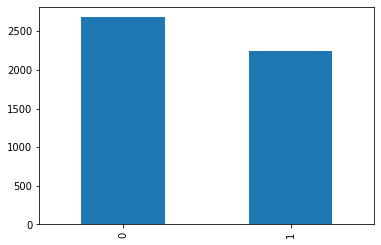

In [23]:
train_label.value_counts().plot(kind = 'bar')


In [24]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']


In [25]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)


['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [30]:
X_train = []
for sentence in tqdm(train_data):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|██████████| 4929/4929 [01:58<00:00, 41.70it/s]


In [31]:
X_train

[['한개', '소리', '안', '들다', '고치', '고', '싶다', '어디서'],
 ['역시',
  '애플',
  '비싸다',
  '비싸다',
  '값',
  '을',
  '같다',
  '정품',
  '기준',
  '설명',
  '가격',
  '제외',
  '아이패드',
  '키',
  '보드',
  '폴리오',
  '대학생',
  '원픽',
  '장점',
  '다양하다',
  '상황',
  '맞다',
  '사용',
  '가능하다',
  '필기',
  '시엔',
  '접다',
  '타이핑',
  '시엔',
  '고정',
  '사용',
  '가능하다',
  '단점',
  '키감',
  '호불호',
  '있다',
  '아이패드',
  '스마트',
  '키',
  '보드',
  '작업',
  '및',
  '고정',
  '형',
  '장점',
  '가다',
  '따로',
  '있다',
  '충전',
  '허브',
  '사용',
  '을',
  '동시',
  '수',
  '있다',
  '전문',
  '적',
  '사용',
  '분',
  '에게',
  '맞다',
  '같다',
  '단점',
  '키',
  '보드',
  '케이스',
  '이기',
  '때문',
  '무게',
  '노트북',
  '비슷하다',
  '지다',
  '휴대',
  '성',
  '을',
  '선호',
  '분',
  '비추다',
  '팬슬',
  '을',
  '사용',
  '패드',
  '케이스',
  '에서',
  '탈',
  '착하다',
  '아이패드',
  '매직',
  '키',
  '보드',
  '분리',
  '적',
  '사용',
  '가능',
  '장점',
  '번',
  '같다',
  '다만',
  '배치',
  '있다',
  '자유',
  '롭고',
  '그날그날',
  '필요',
  '따르다',
  '두다',
  '다니다',
  '수',
  '있다',
  '저',
  '번',
  '단점',
  '따로',
  '있다',
  '관리',
  '신경',
  '을',
  '써다',

In [32]:
X_test = []
for sentence in tqdm(test_data):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)


100%|██████████| 1643/1643 [00:41<00:00, 39.89it/s]


In [33]:
X_test

[['짭슬',
  '쓰다',
  '결국',
  '정품',
  '사다',
  '따로',
  '켜',
  '주지',
  '않다',
  '되다',
  '편하다',
  '터치',
  '로',
  '지우개',
  '전환',
  '가능하다',
  '좋다'],
 ['제품',
  '만족스럽다',
  '배송',
  '최악',
  '이다',
  '비싸다',
  '제품',
  '인',
  '대도',
  '불구',
  '하고',
  '파손',
  '주의',
  '문구',
  '하나',
  '붙이다',
  '않다',
  '상태',
  '로',
  '택배',
  '오다',
  '놀래다',
  '더군다나',
  '박스',
  '완전',
  '찌그러지다',
  '오다',
  '그리고',
  '저',
  '갤럭시',
  '노트',
  '인데',
  '역시',
  '호환성',
  '떨어지다',
  '어자피',
  '올해',
  '아이폰',
  '바꾸다',
  '예정',
  '이지만'],
 ['완충',
  '재다',
  '없이',
  '본',
  '품',
  '박스',
  '만',
  '담기다',
  '오다',
  '너무하다',
  '아니다',
  '비닐',
  '약간',
  '뜯다',
  '오다'],
 ['일만', '고장', '일', '동안', '계속', '쓸다', '덧', '아니다', '고장', '낫다'],
 ['이제',
  '다',
  '들다',
  '하나',
  '씩',
  '가지',
  '고',
  '있다',
  '에어팟',
  '일',
  '것',
  '이다',
  '세대',
  '에어팟',
  '프로',
  '가지',
  '고',
  '있다',
  '입장',
  '에서',
  '리뷰',
  '작성',
  '해보다',
  '착용',
  '감',
  '에어팟',
  '세대',
  '헤드',
  '유닛',
  '작다',
  '때문',
  '귀',
  '걸치다',
  '느낌',
  '을',
  '지우다',
  '없다',
  '과격하다',
  '움직임',
  '에는',
  '불안하다',
 

In [34]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)


In [35]:
print(tokenizer.word_index)


{'을': 1, '있다': 2, '좋다': 3, '되다': 4, '보다': 5, '같다': 6, '로': 7, '구매': 8, '없다': 9, '사용': 10, '안': 11, '너무': 12, '에어팟': 13, '애플': 14, '에서': 15, '쓰다': 16, '이다': 17, '받다': 18, '것': 19, '자다': 20, '배송': 21, '않다': 22, '때': 23, '사다': 24, '저': 25, '오다': 26, '제품': 27, '아니다': 28, '아이폰': 29, '하고': 30, '요': 31, '쿠팡': 32, '다': 33, '워치': 34, '제': 35, '들다': 36, '만': 37, '더': 38, '생각': 39, '고': 40, '고민': 41, '세대': 42, '그냥': 43, '교환': 44, '가격': 45, '거': 46, '일': 47, '충전': 48, '프로': 49, '수': 50, '그렇다': 51, '써다': 52, '정도': 53, '진짜': 54, '못': 55, '나': 56, '상품': 57, '안되다': 58, '되어다': 59, '싶다': 60, '정말': 61, '케이스': 62, '분': 63, '적': 64, '폰': 65, '중': 66, '많이': 67, '기능': 68, '크다': 69, '이어폰': 70, '박스': 71, '가다': 72, '아이패드': 73, '게': 74, '바로': 75, '처음': 76, '배터리': 77, '까지': 78, '해보다': 79, '포장': 80, '그리고': 81, '많다': 82, '정품': 83, '그': 84, '인': 85, '음질': 86, 'ㅎㅎ': 87, '구입': 88, '인데': 89, '시간': 90, '면': 91, '년': 92, '모르다': 93, '전': 94, '확인': 95, '서': 96, '없이': 97, '이라': 98, '만원': 99, '후기': 100, '편하다': 101, '말': 102,

In [36]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 12584
등장 빈도가 2번 이하인 희귀 단어의 수: 6889
단어 집합에서 희귀 단어의 비율: 54.74411951684679
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.4151255471746538


In [37]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 5696


In [38]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [39]:
print(X_train[:3])


[[2076, 107, 11, 36, 4228, 40, 60, 1705], [162, 14, 176, 176, 990, 1, 6, 83, 679, 820, 45, 1555, 73, 465, 721, 4229, 2150, 286, 1112, 655, 106, 10, 238, 358, 4230, 1631, 3839, 4230, 1122, 10, 238, 241, 3556, 2647, 2, 73, 1389, 465, 721, 885, 546, 1122, 213, 286, 72, 466, 2, 48, 4810, 10, 1, 1207, 50, 2, 2925, 64, 10, 63, 304, 106, 6, 241, 465, 721, 62, 1133, 117, 264, 693, 579, 362, 1090, 441, 1, 1208, 63, 1292, 1858, 1, 10, 355, 62, 15, 2529, 1209, 73, 1363, 465, 721, 2648, 64, 10, 737, 286, 173, 6, 554, 4811, 2, 2926, 3840, 4812, 419, 731, 249, 256, 50, 2, 25, 173, 241, 466, 2, 1038, 369, 1, 52, 403, 7, 14, 528, 851, 47, 1859, 8, 238, 554, 716, 511, 1951, 1151, 3304, 128, 8, 238, 117, 1077, 63, 8, 23, 14, 528, 722, 108, 1062, 159, 244], [8, 567, 680, 11, 592, 323, 107, 11, 115, 188, 14, 382, 191, 72, 229, 79, 1039, 79, 812, 683, 1253, 317, 120, 1951, 337, 1467, 1210, 11, 112, 684]]


In [41]:
y_train = np.array(train_label)
y_test = np.array(test_label)


In [42]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]


In [43]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

4915
4915


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


리뷰의 최대 길이 : 1422
리뷰의 평균 길이 : 69.62278738555443


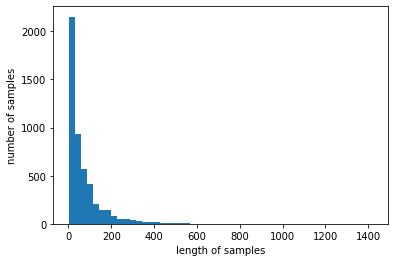

In [44]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [45]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [46]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 44.760935910478125


In [47]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)


In [48]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
61/62 [============================>.] - ETA: 0s - loss: 0.3934 - acc: 0.8291
Epoch 1: val_acc improved from -inf to 0.79858, saving model to best_model.h5
62/62 [==============================] - 9s 90ms/step - loss: 0.3934 - acc: 0.8291 - val_loss: 0.4045 - val_acc: 0.7986
Epoch 2/15
61/62 [============================>.] - ETA: 0s - loss: 0.1929 - acc: 0.9349
Epoch 2: val_acc improved from 0.79858 to 0.94710, saving model to best_model.h5
62/62 [==============================] - 5s 79ms/step - loss: 0.1931 - acc: 0.9349 - val_loss: 0.1693 - val_acc: 0.9471
Epoch 3/15
61/62 [============================>.] - ETA: 0s - loss: 0.1306 - acc: 0.9580
Epoch 3: val_acc did not improve from 0.94710
62/62 [==============================] - 6s 100ms/step - loss: 0.1304 - acc: 0.9580 - val_loss: 0.1639 - val_acc: 0.9440
Epoch 4/15
61/62 [============================>.] - ETA: 0s - loss: 0.0957 - acc: 0.9700
Epoch 4: val_acc did not improve from 0.94710
62/62 [=========================

In [49]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

52/52 [==============================] - 1s 12ms/step - loss: 0.2151 - acc: 0.9221

 테스트 정확도: 0.9221


In [50]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
    return score
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))
    return score

In [1]:
sentiment_predict('잘됩니다')

NameError: ignored

In [59]:
sentiment_predict('상품 불량이네요. 다시는 여기서 안삽니다.')

97.71% 확률로 부정 리뷰입니다.



0.022929668426513672